## Student Name: Aycan Lizor
## Student ID : N01534088

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import pandas as pd
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix

MAE, RSE
replace yerine dummy kullan
en fazla 5 feature seç
PCA kullan feature adedini belirlemek için


Your project is approved with the following title

"Car Sale Prediction Using Three different types of Regressions i.e Linear Regression, Decision Tree Regression
and Support Vector Regression".

Regards,
Zeeshan

In [166]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading Data

In [167]:

dataset = pd.read_csv('/content/drive/MyDrive/Machine_Learning/Project/CarPrice_Assignment.csv')
raw_df = pd.DataFrame(dataset)
raw_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [168]:
df = raw_df
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# Correcting spelling error

In [169]:
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [170]:
df['CarName'] = df['CarName'].str.split().str[0]

df.CarName = df.CarName.str.lower()
def replace_name(a,b): df.CarName.replace(a,b,inplace=True)
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

In [171]:
df.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# Checking whether any dublicate exist or not

In [172]:
df.loc[df.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [173]:

df['doornumber'].replace('two', 'two-doors', inplace=True)
df['doornumber'].replace('four', 'four-doors', inplace=True)

df_dummies = pd.get_dummies(df[['doornumber','cylindernumber','fueltype','drivewheel','carbody','aspiration','enginelocation','enginetype','fuelsystem']],prefix = '', prefix_sep ='')
df_dummies.head()

,four-doors,two-doors,eight,five,four,six,three,twelve,two,diesel,...,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [174]:
df = pd.concat([df,df_dummies], axis = 1)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,3,alfa-romero,gas,std,two-doors,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero,gas,std,two-doors,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero,gas,std,two-doors,hatchback,rwd,front,94.5,...,1,0,0,0,0,0,0,1,0,0
3,4,2,audi,gas,std,four-doors,sedan,fwd,front,99.8,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi,gas,std,four-doors,sedan,4wd,front,99.4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four-doors,sedan,rwd,front,109.1,...,0,0,0,0,0,0,0,1,0,0
201,202,-1,volvo,gas,turbo,four-doors,sedan,rwd,front,109.1,...,0,0,0,0,0,0,0,1,0,0
202,203,-1,volvo,gas,std,four-doors,sedan,rwd,front,109.1,...,1,0,0,0,0,0,0,1,0,0
203,204,-1,volvo,diesel,turbo,four-doors,sedan,rwd,front,109.1,...,0,0,0,0,0,1,0,0,0,0


In [175]:
columns_to_drop = ['car_ID','CarName','doornumber','cylindernumber','fueltype','drivewheel','carbody','aspiration','enginelocation','enginetype','fuelsystem']
df = df.drop(columns=columns_to_drop)

df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,1,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,1,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,1,0,0,0,0


In [176]:
df.shape


(205, 53)

In [177]:
r = np.corrcoef(df['symboling'], df['price'])[0,1]
r

-0.07997822464270347

In [178]:
df.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'four-doors',
       'two-doors', 'eight', 'five', 'four', 'six', 'three', 'twelve', 'two',
       'diesel', 'gas', '4wd', 'fwd', 'rwd', 'convertible', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'std', 'turbo', 'front', 'rear', 'dohc',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', '1bbl', '2bbl', '4bbl',
       'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [179]:
my_dict = {}


# Add elements to the dictionary using a for loop
for col in df.columns:
    try:
        correlation = np.corrcoef(df[col], df['price'])[0, 1]
        my_dict[col] = correlation
    except ValueError:
        print(f"Error calculating correlation for column '{col}': Dimension mismatch")


In [180]:
my_dict

{'symboling': -0.07997822464270347,
 'wheelbase': 0.5778155982921496,
 'carlength': 0.6829200156779629,
 'carwidth': 0.7593252997415118,
 'carheight': 0.11933622657049436,
 'curbweight': 0.8353048793372965,
 'enginesize': 0.8741448025245112,
 'boreratio': 0.5531732367984434,
 'stroke': 0.079443083881931,
 'compressionratio': 0.06798350579944265,
 'horsepower': 0.8081388225362212,
 'peakrpm': -0.08526715027785685,
 'citympg': -0.6857513360270401,
 'highwaympg': -0.6975990916465566,
 'price': 1.0,
 'four-doors': 0.031835265845609785,
 'two-doors': -0.031835265845609785,
 'eight': 0.47861442680293276,
 'five': 0.2496059197240642,
 'four': -0.6977616598768152,
 'six': 0.47497790672882667,
 'three': -0.07138775403899131,
 'twelve': 0.1996335683646365,
 'two': -0.004544155374409566,
 'diesel': 0.10567948235973912,
 'gas': -0.10567948235973912,
 '4wd': -0.05886613861051326,
 'fwd': -0.6019502965330914,
 'rwd': 0.6389565386618765,
 'convertible': 0.18768120842907324,
 'hardtop': 0.225854011910

In [181]:
# Retrieve the key-value pairs in ascending order based on the values
sorted_pairs = sorted(my_dict.items(), key=lambda x: x[1])

# Print the sorted pairs
for key, value in sorted_pairs:
    print(key, ':', value)


four : -0.6977616598768152
highwaympg : -0.6975990916465566
citympg : -0.6857513360270401
fwd : -0.6019502965330914
2bbl : -0.5013743424965753
ohc : -0.3442701459263223
front : -0.3249733010809564
hatchback : -0.2620392214226011
std : -0.17792622463097804
1bbl : -0.1709453976298499
gas : -0.10567948235973912
peakrpm : -0.08526715027785685
symboling : -0.07997822464270347
three : -0.07138775403899131
spdi : -0.06147484665042506
4wd : -0.05886613861051326
wagon : -0.042309712156878725
two-doors : -0.031835265845609785
spfi : -0.01958015125724177
4bbl : -0.017306042593932123
two : -0.004544155374409566
rotor : -0.004544155374409566
mfi : -0.0027472926969853316
ohcf : 0.0162848703533139
four-doors : 0.031835265845609785
l : 0.042267237766542204
compressionratio : 0.06798350579944265
stroke : 0.079443083881931
diesel : 0.10567948235973912
idi : 0.10567948235973912
carheight : 0.11933622657049436
sedan : 0.12571648234713798
dohc : 0.1514287754851952
dohcv : 0.15922504386155747
turbo : 0.1779

<Figure size 2000x500 with 0 Axes>

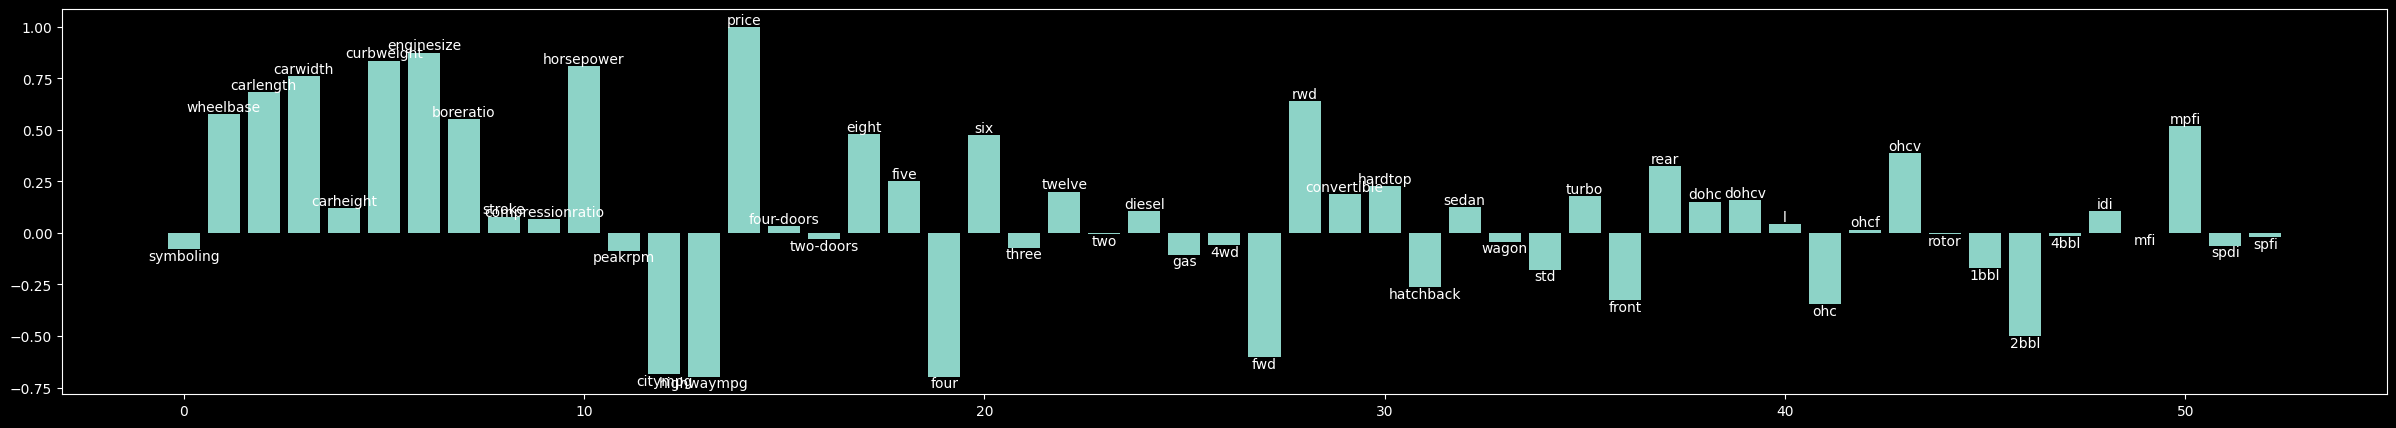

In [182]:
plt.figure(figsize=(20, 5))

keys = my_dict.keys()
values = my_dict.values()

plt.figure(figsize=(30, 5))
bars=plt.bar(range(len(my_dict)), values)

# Add labels to the bars
plt.bar_label(bars, labels=keys)
plt.show()


In [183]:
fig = px.histogram(df,x='enginesize',marginal='box',title='Distribution of Engine Size')
fig.update_layout(bargap=0.1)
fig.show()

In [184]:
fig = px.histogram(df,x='curbweight',marginal='box',title='Distribution of Curbweight (The weight of a car without occupants or baggage)',color_discrete_sequence=['green'])
fig.update_layout(bargap=0.1)
fig.show()

In [185]:
raw_df
fig = px.scatter(raw_df,
                 x='enginesize',
                 y='price',
                 color='CarName',
                 hover_data=['price'],
                 title='Price vs. Model')
fig.update_traces(marker_size=5)
fig.show()

# Scale data

In [186]:
x = df[['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'four-doors',
       'two-doors', 'eight', 'five', 'four', 'six', 'three', 'twelve', 'two',
       'diesel', 'gas', '4wd', 'fwd', 'rwd', 'convertible', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'std', 'turbo', 'front', 'rear', 'dohc',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', '1bbl', '2bbl', '4bbl',
       'idi', 'mfi', 'mpfi', 'spdi', 'spfi']].values
y = df['price'].values


In [187]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(x)
data_scaled

array([[ 1.74347043, -1.6907718 , -0.42652147, ...,  1.08666971,
        -0.21428571, -0.070014  ],
       [ 1.74347043, -1.6907718 , -0.42652147, ...,  1.08666971,
        -0.21428571, -0.070014  ],
       [ 0.133509  , -0.70859588, -0.23151305, ...,  1.08666971,
        -0.21428571, -0.070014  ],
       ...,
       [-1.47645244,  1.72187336,  1.19854871, ...,  1.08666971,
        -0.21428571, -0.070014  ],
       [-1.47645244,  1.72187336,  1.19854871, ..., -0.92024282,
        -0.21428571, -0.070014  ],
       [-1.47645244,  1.72187336,  1.19854871, ...,  1.08666971,
        -0.21428571, -0.070014  ]])

# Applying PCA From 1 to 10 Number of Components

In [188]:
# Create an empty dictionary
my_dict_PCA = {}


In [189]:
from sklearn.decomposition import PCA
for i in range(11):
  pca = PCA(n_components = i)
  X_pca = pca.fit_transform(data_scaled)
  np_calculated=np.sum(pca.explained_variance_ratio_)
  my_dict_PCA[i]= np_calculated


In [190]:
for key, value in my_dict_PCA.items():
    print(f"{key}: {value}")

0: 0.0
1: 0.19720352937281962
2: 0.32523550334369333
3: 0.4021693602692593
4: 0.46107618406641315
5: 0.5176349464535834
6: 0.5636507733821245
7: 0.6035096872123242
8: 0.6362350354425927
9: 0.6658684475001807
10: 0.6942698614919619


In [191]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = df[['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'four-doors',
       'two-doors', 'eight', 'five', 'four', 'six', 'three', 'twelve', 'two',
       'diesel', 'gas', '4wd', 'fwd', 'rwd', 'convertible', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'std', 'turbo', 'front', 'rear', 'dohc',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', '1bbl', '2bbl', '4bbl',
       'idi', 'mfi', 'mpfi', 'spdi', 'spfi']]
X_scaled = sc.fit_transform(X)
X_scaled

array([[ 1.74347043, -1.6907718 , -0.42652147, ...,  1.08666971,
        -0.21428571, -0.070014  ],
       [ 1.74347043, -1.6907718 , -0.42652147, ...,  1.08666971,
        -0.21428571, -0.070014  ],
       [ 0.133509  , -0.70859588, -0.23151305, ...,  1.08666971,
        -0.21428571, -0.070014  ],
       ...,
       [-1.47645244,  1.72187336,  1.19854871, ...,  1.08666971,
        -0.21428571, -0.070014  ],
       [-1.47645244,  1.72187336,  1.19854871, ..., -0.92024282,
        -0.21428571, -0.070014  ],
       [-1.47645244,  1.72187336,  1.19854871, ...,  1.08666971,
        -0.21428571, -0.070014  ]])

# Creating New Features Using PCA

In [192]:
pca = PCA(n_components = 7)
X = pca.fit_transform(data_scaled)
X.shape

(205, 7)

In [193]:
y= df['price']
y.shape

(205,)

# Applying Linear Regression

In [194]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

lr = LinearRegression()
# Step 1: Train the linear regression model
LinReg = lr.fit(X_train,y_train)

# Step 2: Obtain predicted values
y_pred = LinReg.predict(X_test)
from sklearn import metrics

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


RMSE: 3965.2787212321045


In [195]:
import numpy as np
from sklearn.metrics import mean_absolute_error
# Step 3: Compute the mean absolute error
print('MAE:',mean_absolute_error(y_test, y_pred))


MAE: 2704.4481996463564


# Decision Tree Regression Model

In [196]:

# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn import tree

Y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
regressor = DecisionTreeRegressor(random_state=100, max_depth=3, min_samples_leaf=5)

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df


,Real Values,Predicted Values
160,7738.0,6690.085714
186,8495.0,8797.880952
59,8845.0,8797.880952
165,9298.0,8797.880952
140,7603.0,8797.880952
...,...,...
28,8921.0,8797.880952
29,12964.0,14762.642857
182,7775.0,8797.880952
40,10295.0,8797.880952


# Visualising the Decision Tree Regression Results